# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [9]:
url = 'https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/dataset.csv'
df = pd.read_csv(url)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [11]:
pd.options.display.max_columns=200
pd.options.display.max_rows=40
df.sample(40)


,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
1875,36099,34300,3614,10.536443,3899,11.367347,4713,13.740525,4220,12.303207,3881,11.314869,4824,14.064140,4707,13.723032,2861,8.341108,1581,4.609329,31356,91.416910,1875,5.466472,174,0.507289,280,0.816327,3,0.008746,612,1.784257,34300,-27,2749,9.5,9.3,0.3,0.5,-1.5,-1.0,3612,8665,7345,5181,14.6,34.9,29.6,20.9,4000,12.6,19.9,18.6,54184,50691,57677,16087,15465,622,3.9,54184,80.1,375.1,304.1,112.9,94.8,10.2,7.4,22.134514,15.608773,0.291359,36.367230,11.373535,85.842107,0,34843,8362,24.0,Seneca,New York,36,99,27496,44.9,42.8,47.0,12353,36.7,35.2,38.1,10091,8.3,7.5,9.2,2282,9.4,8.0,11.0,2587,11.9,10.9,12.9,3270,3.2,3.0,3.5,879,5
1178,23007,29897,2703,9.041041,3529,11.803860,3503,11.716895,3066,10.255210,3267,10.927518,4611,15.422952,4743,15.864468,2998,10.027762,1477,4.940295,28949,96.829113,175,0.585343,142,0.474964,144,0.481654,14,0.046827,473,1.582099,29897,45,1107,7.7,11.3,-3.6,-0.2,5.4,5.2,1584,8013,6475,5474,7.4,37.2,30.1,25.4,4141,14.5,20.4,18.7,49561,47215,51907,14471,13890,581,4.0,49561,89.2,330.2,305.7,128.9,119.7,12.1,11.7,24.571579,12.419816,0.759485,17.981928,24.973660,50.126022,5,30177,8571,28.4,Franklin,Maine,23,7,24662,39.2,36.9,41.2,9668,30.2,28.7,31.6,7448,8.4,7.5,9.3,2066,8.9,7.5,10.3,2190,11.2,10.2,12.2,2756,3.3,3.1,3.6,824,6
1082,21183,24087,3065,12.724706,3351,13.912069,2743,11.387886,2881,11.960809,2998,12.446548,3203,13.297629,2947,12.234815,1931,8.016773,968,4

In [12]:
df[['R_birth_2018','R_death_2018','Employed_2018','Unemployed_2018']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R_birth_2018     3140 non-null   float64
 1   R_death_2018     3140 non-null   float64
 2   Employed_2018    3140 non-null   int64  
 3   Unemployed_2018  3140 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 98.2 KB


In [13]:
df_frac=df[['R_birth_2018','R_death_2018','Employed_2018','Unemployed_2018']]

In [19]:
round(df_frac.describe())

,R_birth_2018,R_death_2018,Employed_2018,Unemployed_2018
count,3140.0,3140.0,3140.0,3140.0
mean,11.0,10.0,49470.0,2005.0
std,3.0,3.0,161957.0,6971.0
min,0.0,0.0,0.0,0.0
25%,10.0,9.0,4714.0,201.0
50%,11.0,10.0,11115.0,483.0
75%,12.0,12.0,30344.0,1276.0
max,30.0,22.0,4896512.0,239829.0


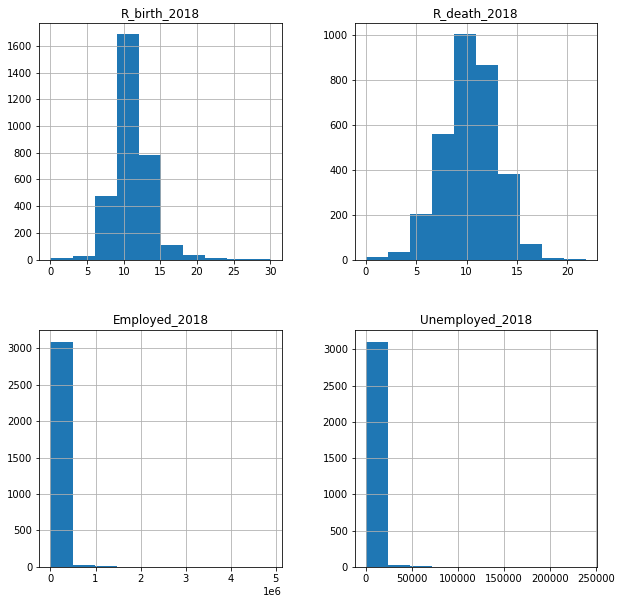

In [18]:
df_frac.hist(figsize=(10,10), sharex=False)
plt.show()

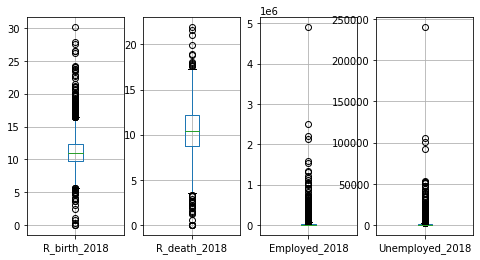

In [33]:
fig,ax = plt.subplots(1,4,figsize=(8,4))
df_frac[['R_birth_2018']].boxplot(ax=ax[0])
df_frac[['R_death_2018']].boxplot(ax=ax[1])
df_frac[['Employed_2018']].boxplot(ax=ax[2])
df_frac[['Unemployed_2018']].boxplot(ax=ax[3])
plt.show()

In [34]:
# no vamos a predecir y por tanto debemos sacar variables
# no podemos usar todas la columnas
# los datos son del 2018 y 2019
# correlacion entre columna para analizar si corresponde o no usar
df_frac.corr()

,R_birth_2018,R_death_2018,Employed_2018,Unemployed_2018
R_birth_2018,1.000000,-0.211637,0.077301,0.080367
R_death_2018,-0.211637,1.000000,-0.210241,-0.180803
Employed_2018,0.077301,-0.210241,1.000000,0.979277
Unemployed_2018,0.080367,-0.180803,0.979277,1.000000


In [ ]:
pd.options.display.max_columns=200
pd.options.display.max_rows=200
df.corr()

In [41]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso

In [39]:
# vamos a sacar el data set de pruebas y dejar en data set de aprendizaje
X = df_frac[['R_birth_2018','R_death_2018','Unemployed_2018']]
y = df_frac[['Employed_2018']]
# sino hago esto se va a producir un ##data leakage## no podemos hacer estadistica hay que sacarlo antes de hacer el EDA

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=57)  

In [45]:
scaler = MinMaxScaler()
print(scaler.fit(X_train))
print(scaler.data_max_)
print(scaler.transform(X_train))


MinMaxScaler()
[2.78000e+01 2.16000e+01 1.05409e+05]
[[0.43884892 0.52777778 0.00892747]
 [0.5323741  0.3287037  0.00108154]
 [0.26978417 0.625      0.0041554 ]
 ...
 [0.47482014 0.43055556 0.02102367]
 [0.43165468 0.39814815 0.00220103]
 [0.36330935 0.64814815 0.00565438]]
